<a href="https://colab.research.google.com/github/ann-maria-shaji/myprojects/blob/main/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score,confusion_matrix,recall_score,roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/diabetes_data_upload.csv')
df.head()

Checking missing values


In [ ]:
df.isna().sum()

Age                   0
Gender                0
highurine             0
thirst                0
sudden weight loss    0
weakness              0
Polyphagia            0
visual blurring       0
Irritability          0
partial paresis       0
muscle stiffness      0
Obesity               0
class                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   highurine           520 non-null    object
 3   thirst              520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   visual blurring     520 non-null    object
 8   Irritability        520 non-null    object
 9   partial paresis     520 non-null    object
 10  muscle stiffness    520 non-null    object
 11  Obesity             520 non-null    object
 12  class               520 non-null    object
dtypes: int64(1), object(12)
memory usage: 52.9+ KB


Distribution of Target variable

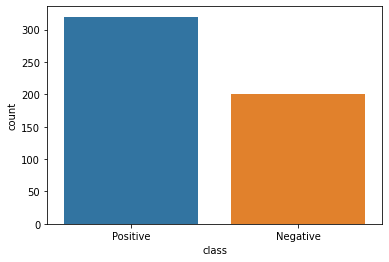

In [ ]:
import seaborn as sns
sns.countplot(df['class'],data=df)

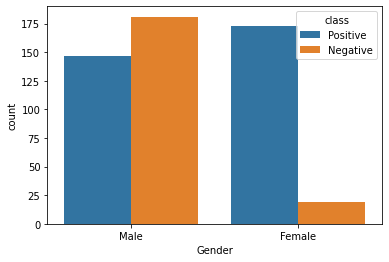

In [ ]:
#distribution of gender
#similarly we can plot distribution of any features
import seaborn as sns
sns.countplot(df['Gender'],hue=df['class'],data=df) 

Data pre-processing


In [ ]:

df["class"] = df["class"].apply(lambda x:0 if x=="Negative" else 1)
print(df["class"])

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int64


In [ ]:
X = df.drop(["class"],axis=1)
y = df["class"]

In [ ]:
objList = X.select_dtypes(include ="object").columns
print(objList)

Index(['Gender', 'highurine', 'thirst', 'sudden weight loss', 'weakness',
       'Polyphagia', 'visual blurring', 'Irritability', 'partial paresis',
       'muscle stiffness', 'Obesity'],
      dtype='object')


In [ ]:
#label encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
  X[feat] = le.fit_transform(X[feat].astype(str))
  print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    int64 
 2   highurine           520 non-null    object
 3   thirst              520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   visual blurring     520 non-null    object
 8   Irritability        520 non-null    object
 9   partial paresis     520 non-null    object
 10  muscle stiffness    520 non-null    object
 11  Obesity             520 non-null    object
dtypes: int64(2), object(10)
memory usage: 48.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------  

In [ ]:
X.head()

,Age,Gender,highurine,thirst,sudden weight loss,weakness,Polyphagia,visual blurring,Irritability,partial paresis,muscle stiffness,Obesity
0,40,1,0,1,0,1,0,0,0,0,1,1
1,58,1,0,0,0,1,0,1,0,1,0,0
2,41,1,1,0,0,1,1,0,0,0,1,0
3,45,1,0,0,1,1,1,0,0,0,0,0
4,60,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
#correlation

X.corrwith(y)

Age                   0.108679
Gender               -0.449233
highurine             0.665922
thirst                0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
visual blurring       0.251300
Irritability          0.299467
partial paresis       0.432288
muscle stiffness      0.122474
Obesity               0.072173
dtype: float64

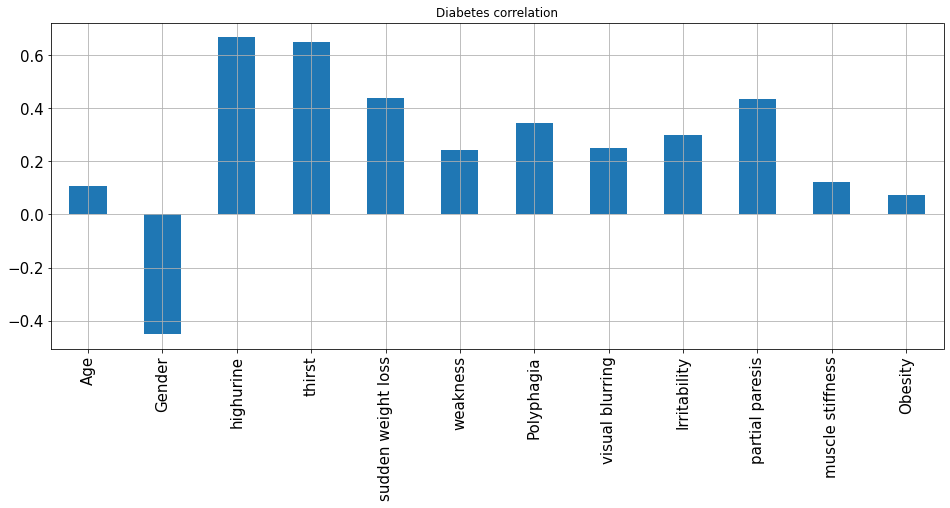

In [ ]:
#correlation with response variable class 

X.corrwith(y).plot.bar(figsize = (16,6), title = "Diabetes correlation", fontsize=15, rot = 90,grid = True)


Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify=y,random_state =1234)

In [ ]:
#target variable distribution checking
print('Distribution of target variable in training set')
print(y_train.value_counts())

print('Distribution of target variable in test set')
print(y_test.value_counts())


Distribution of target variable in training set
1    256
0    160
Name: class, dtype: int64
Distribution of target variable in test set
1    64
0    40
Name: class, dtype: int64


In [ ]:
#data normalization

minmax = MinMaxScaler()
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.transform(X_test[['Age']])

In [ ]:
X_train.head()

,Age,Gender,highurine,thirst,sudden weight loss,weakness,Polyphagia,visual blurring,Irritability,partial paresis,muscle stiffness,Obesity
246,0.405405,1,0,0,0,1,0,0,0,0,0,0
274,0.554054,1,0,0,0,0,1,1,0,0,1,0
424,0.364865,1,1,1,1,1,0,0,0,0,0,0
316,0.527027,0,0,0,0,1,0,0,0,1,0,0
159,0.297297,0,1,1,1,1,1,1,1,1,1,0


Model Building


In [ ]:
#logistic regression
logis = LogisticRegression(random_state = 0, penalty = "l2")
logis.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits = 10, random_state=7)
scoring = "accuracy"

acc_logi = cross_val_score(estimator=logis, X = X_train, y = y_train,cv = kfold,scoring = scoring)
acc_logi.mean()

0.8797328687572591

In [ ]:
y_predict_logi = logis.predict(X_test)
acc = accuracy_score(y_test, y_predict_logi)
roc = roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test,y_predict_logi)

results = pd.DataFrame([["LogisticRegression",acc, acc_logi.mean(),prec, rec,f1, roc]],
                       columns = ["Model", "Accuracy", "Cross Val Accuracy", "Precision", "Recall", "F1 Score", "ROC"])
results





,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,LogisticRegression,0.932692,0.879733,0.952381,0.9375,0.944882,0.93125


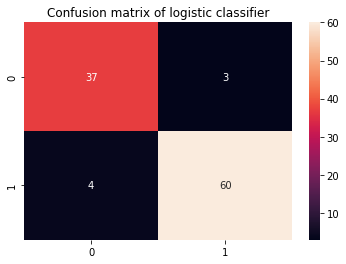

In [ ]:
cm_logi = confusion_matrix(y_test, y_predict_logi)
plt.title("Confusion matrix of logistic classifier")
sns.heatmap(cm_logi, annot = True, fmt ="d")
plt.show()

In [ ]:
TP = cm_logi[1,1] #true positive
TN = cm_logi[0,0] #true negative
FP = cm_logi[0,1] #false positive
FN = cm_logi[1,0] #false negative
TN/float(TN+FP) #calculating specificity

0.925

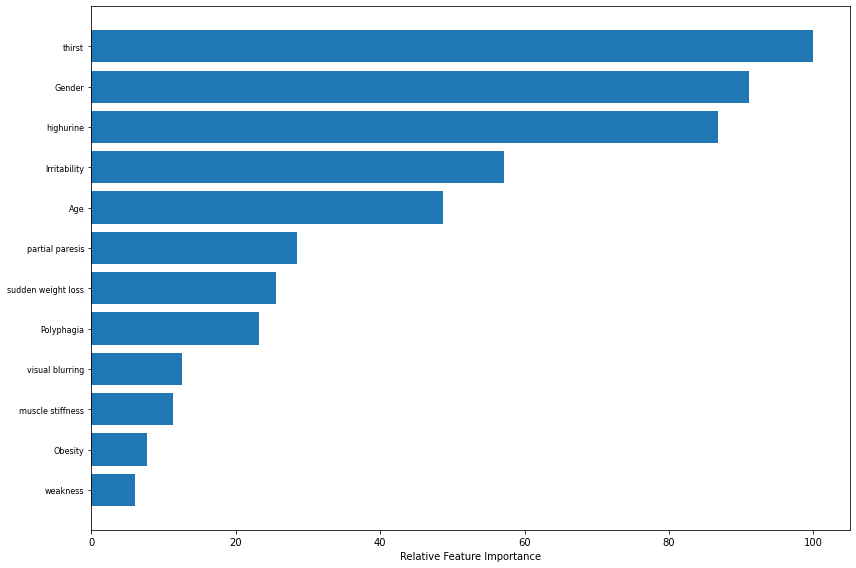

In [ ]:
feature_importance = abs(logis.coef_[0])
feature_importance = 100.0*(feature_importance/feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .3

featfig = plt.figure(figsize=(12,8))
featax = featfig.add_subplot(1,1,1)
featax.barh(pos, feature_importance[sorted_idx], align="center")
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx],fontsize = 8)
featax.set_xlabel("Relative Feature Importance")
plt.tight_layout()
plt.show()